In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [244]:
import time

# Задача 1

In [185]:
def shift_kron_delta(shift): 
    # реализация символа дельта-кронекера со сдвигом
    return lambda i, j: (i==j-shift).astype("float64")

def shift_rand_kron_delta(shift, dim): 
    # реализация случайного символа дельта-кронекера со сдвигом
    return lambda i, j: (i==j-shift).astype("float64") * np.random.random(dim)

def sub_diag(dim, shift, rand=False):
    # генерация на побочной диагонали единиц
    if rand:
        return np.fromfunction(shift_rand_kron_delta(shift, dim), dim, dtype="float64")
    else: 
        return np.fromfunction(shift_kron_delta(shift), dim, dtype="float64")

def eye_band_matrix(shifts, dim):
    # генерация случайной ленточной матрицы 
    base = np.zeros(dim)
    for shift in shifts:
        base += sub_diag(dim, shift)
    return base    

def rand1_band_matrix(shifts, dim):
    # генерация случайной ленточной матрицы 
    base = np.zeros(dim)
    for shift in shifts:
        base += sub_diag(dim, shift, rand=True)
    return base

def rand2_band_matrix(shifts, dim):
    # генерация случайной ленточной матрицы с постоянными коэффициентами
    base = np.zeros(dim)
    for shift in shifts:
        base += sub_diag(dim, shift) * np.random.random()
    return base

In [123]:
dim = (4, 3);
shifts = [-1, 0, 1];

M = rand1_band_matrix(shifts, dim)
print(np.round(M, 2))

M = rand2_band_matrix(shifts, dim)
print(np.round(M, 2))

[[0.62 0.23 0.  ]
 [0.09 0.93 0.06]
 [0.   0.66 0.03]
 [0.   0.   0.78]]
[[0.45 0.73 0.  ]
 [0.77 0.45 0.73]
 [0.   0.77 0.45]
 [0.   0.   0.77]]


In [127]:
# возмущение
dim = (3, 3)
epsilon = 0.1
np.random.random(dim) * epsilon

array([[0.01531675, 0.06623767, 0.02201659],
       [0.03198044, 0.03597555, 0.02196459],
       [0.019283  , 0.06918162, 0.00451501]])

## реализация из задания

In [169]:
import sys

In [189]:
dim = 5
m = 3

A = eye_band_matrix([0, -1, 1, -m, m], (dim, dim))

b = np.ones(dim)
x = scipy.linalg.solve(A, b)

print("size:", sys.getsizeof(A))
print(A)
print(np.round(x, 10))

size: 312
[[1. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 1.]]
[0.2 0.4 0.2 0.4 0.2]


In [183]:
dim = 5
m = 3

Ap, As, An, Aw, Ae = np.ones(dim), np.ones(dim), np.ones(dim), np.ones(dim), np.ones(dim)
diagonals = [Ap, As, An, Aw, Ae]
# если подставить вместо Ap, As, ... нужные вектора -- получим на выходе нужную матрицу

A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()

b = np.ones(dim)
x = scipy.linalg.solve(A, b)

print("size:", sys.getsizeof(A))
print(A)
print(np.round(x, 10))

size: 312
[[1. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 1.]]
[0.2 0.4 0.2 0.4 0.2]


In [200]:
dim = 5
m = 3

Ap, As, An, Aw, Ae = np.ones(dim), np.ones(dim), np.ones(dim), np.ones(dim), np.ones(dim)
A = np.zeros((2 * m + 1, dim))

A[0] = Ae
A[m - 1] = An
A[m] = Ap
A[m + 1] = As
A[2 * m] = Aw

b = np.ones(dim)
x = scipy.linalg.solve_banded((m, m), A, b)

print("size:", sys.getsizeof(A))
print(np.round(x, 10))

size: 392
[0.2 0.4 0.2 0.4 0.2]


In [182]:
dim = 5
m = 3

Ap, As, An, Aw, Ae = np.ones(dim), np.ones(dim), np.ones(dim), np.ones(dim), np.ones(dim)
diagonals = [Ap, As, An, Aw, Ae]

A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
x = spsolve(A,b)

print("size:", sys.getsizeof(A))
print(np.round(x, 10))

size: 56
[0.2 0.4 0.2 0.4 0.2]


### Функции

In [190]:
dim = 5
m = 3

Ap, As, An, Aw, Ae = np.ones(dim), np.ones(dim), np.ones(dim), np.ones(dim), np.ones(dim)
diagonals = [Ap, As, An, Aw, Ae]
# если подставить вместо Ap, As, ... нужные вектора -- получим на выходе нужную матрицу

A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()

b = np.ones(dim)
x = scipy.linalg.solve(A, b)

In [426]:
def get_band_matrix_v1(diagonals, shifts):
    return scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()


# v2 -- не генрация ленточной матриц, а подготовка к solve_banded
def get_band_matrix_v2(diagonals, shifts):
    Ap, As, An, Aw, Ae = diagonals
    
    dim = diagonals[0].shape[0]
    m = np.max(np.abs(shifts))
    A = np.zeros((2 * m + 1, dim))

    for i in range(len(shifts)):
        ind = m - shifts[i]
        A[ind] = diagonals[i]

    return A


def get_band_matrix_v3(diagonals, shifts):
    return scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])

In [428]:
def get_time(f):
    
     def wrap_f(*args):
        start = time.time()
        output = f(*args)
        t = time.time() - start
 
        return t
#         return output

     return wrap_f

In [429]:
@get_time
def get_band_sol_v1(A, b):
    return scipy.linalg.solve(A, b)

@get_time
def get_band_sol_v2(A, b):
#     m = np.int((A.shape[0]-1)/2)
    m = 3
    return scipy.linalg.solve_banded((m, m), A, b)

@get_time
def get_band_sol_v3(A, b):
    return spsolve(A,b)

@get_time
def get_band_sol_v4(A, b):
    return scipy.sparse.linalg.splu(A).solve(b)

In [433]:
# проверка функций
shifts = [0, -1, 1, -3, 3]
dim = 1000

diagonals = np.ones((5, dim))
b = np.ones(dim)
A1 = get_band_matrix_v1(diagonals, shifts)
A2 = get_band_matrix_v2(diagonals, shifts)
A3 = get_band_matrix_v3(diagonals, shifts)

print(get_band_sol_v1(A1, b))
print(get_band_sol_v2(A2, b))
print(get_band_sol_v3(A3, b))
print(get_band_sol_v4(A3, b))

0.02593207359313965
0.0
0.0009968280792236328
0.0009980201721191406


### Смотрим на размер

In [435]:
shifts = [0, -1, 1, -3, 3]
dims = range(100, 500, 10)

sizes = []

for dim in dims:
    diagonals = np.ones((5, dim))
    b = np.ones(dim)
    
    A1 = get_band_matrix_v1(diagonals, shifts)
    A2 = get_band_matrix_v2(diagonals, shifts)
    A3 = get_band_matrix_v3(diagonals, shifts)
    A4 = scipy.sparse.linalg.splu(A3)
    
    sizes.append([sys.getsizeof(A1), sys.getsizeof(A2), sys.getsizeof(A3), sys.getsizeof(A4)])

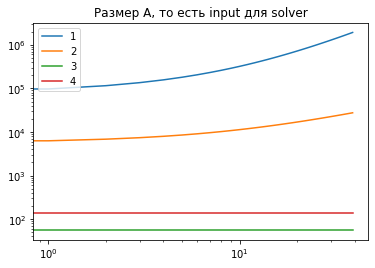

In [437]:
sizes = np.array(sizes)
plt.plot(sizes[:, 0], label="1")
plt.plot(sizes[:, 1], label="2")
plt.plot(sizes[:, 2], label="3")
plt.plot(sizes[:, 3], label="4")
plt.legend()
plt.yscale("log")
plt.title("Размер A, то есть input для solver")
plt.xscale("log")
plt.show()

### Смотрим на время

In [371]:
shifts = [0, -1, 1, -3, 3]
dims1 = range(500, 1500, 10)
rep = 10

times1 = []

for dim in dims1:
    diagonals = np.ones((5, dim))
    b = np.ones(dim)
    
    t1 = 0
    for _ in range(rep):
        A1 = get_band_matrix_v1(diagonals, shifts)
        t1 += get_band_sol_v1(A1, b)/rep
    times1.append(t1)

In [375]:
shifts = [0, -1, 1, -3, 3]
dims2 = range(500, 1500, 10)
rep = 1000

times2 = []

for dim in dims2:
    diagonals = np.ones((5, dim))
    b = np.ones(dim)
    
    t2 = 0
    for _ in range(rep):
        A2 = get_band_matrix_v2(diagonals, shifts)
        t2 += get_band_sol_v2(A2, b)/rep
    times2.append(t2)

In [405]:
shifts = [0, -1, 1, -3, 3]
dims3 = range(500, 1500, 10)
rep = 200

times3 = []

for dim in dims3:
    diagonals = np.ones((5, dim))
    b = np.ones(dim)
    
    t3 = 0
    for _ in range(rep):
        A3 = get_band_matrix_v3(diagonals, shifts)
        t3 += get_band_sol_v3(A3, b)/rep
    times3.append(t3)

D:\Apps\Anaconda\envs\TF21\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [438]:
shifts = [0, -1, 1, -3, 3]
dims4 = range(500, 1500, 10)
rep = 200

times4 = []

for dim in dims3:
    diagonals = np.ones((5, dim))
    b = np.ones(dim)
    
    t4 = 0
    for _ in range(rep):
        A3 = get_band_matrix_v3(diagonals, shifts)
        t4 += get_band_sol_v4(A3, b)/rep
    times4.append(t4)

D:\Apps\Anaconda\envs\TF21\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


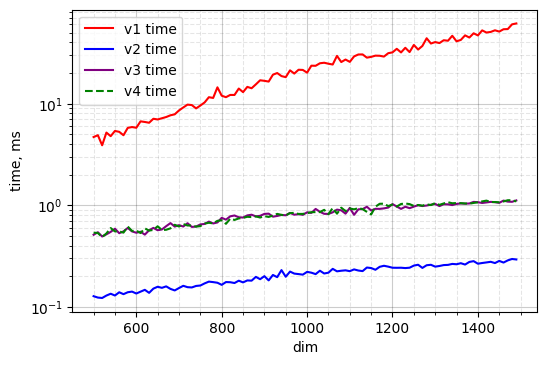

In [442]:
times1 = np.array(times1)
times2 = np.array(times2)
times3 = np.array(times3)
times4 = np.array(times4)

fig, ax = plt.subplots(dpi=100)
plt.plot(dims1, 1000 * times1, label="v1 time", color="red")
plt.plot(dims2, 1000 * times2, label="v2 time", color="blue")
plt.plot(dims3, 1000 * times3, label="v3 time", color="purple")
plt.plot(dims4, 1000 * times4, "--", label="v4 time", color="green")

plt.xlabel("dim")
plt.ylabel("time, ms")
plt.yscale("log")
# plt.xscale("log")
plt.legend()
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
plt.show()

Выход третьего метода не подходит в таком виде для spsolve, надо бы как-то перейти к CSC или CSR формату.

# Задача 2

см. задачу 1, v4.

# Задача 3

см. .pdf файл.

# Задача 4

теор. часть см. в [pdf-файл](https://github.com/k1242/notes_5sem/blob/main/comp_math/theory_hw/comp_math_hw.pdf) с заданием

## метод гаусса

Возьмем реализацию из B1.

In [443]:
def gauss2ladder(M):
    M = M.astype("float64")
    n, m = M.shape
    step = 0
    shift = 0

    for i in range(m):
        # берем максимальный элемент
        if step < n:
            i_mnz = step+np.argmax(np.abs(M[step:, step+shift]))
        else: continue

#         print(i_mnz)
    
        if M[:, step+shift][i_mnz] != 0:
            M[[step, i_mnz]] = M[[i_mnz, step]]
        else:
            shift += 1
            continue
        
#         print(np.round(M, 2))

        for j in range(step + 1, n):
            M[j] -=  M[step] / M[step, i] * M[j, i]
        step += 1
        
#         print(np.round(M, 2), end="\n\n")

    return M

In [446]:
def get_rang(M):
    rang = np.sum(np.abs(gauss2ladder(M)), 1).nonzero()[0].shape[0]
    return rang

In [444]:
def get_gauss_sol(M, f):
    M = M.astype("float64")
    f = f.astype("float64")
    
    f = f.reshape(1, -1)
    n = f.shape[1]
    
    x = np.zeros(n)
    
    if get_rang(M) != n:
        return "err: вырожденная матрица"
    
    Mf = np.concatenate((M, f.reshape(n, 1)), axis=1)
    Mf = gauss2ladder(Mf)
    
    for i in range(n-1, -1, -1):
        tmp = 0.
        
        for j in range(i + 1, n):
            tmp += x[j] * Mf[i, j]
    
        x[i] = (Mf[i, n] - tmp) / Mf[i, i]
    return x

In [447]:
M = np.array(
    [[1, 2, 4],
     [4, 0 ,1],
     [5, 2, 10]]);
f = np.array([1, 2, 4]);

ans = get_gauss_sol(M, f)
print("ans:  ", ans)
print("M@ans:", M@ans)

ans:   [ 0.45  -0.125  0.2  ]
M@ans: [1. 2. 4.]


## метод вращений

см. https://github.com/danbar/qr_decomposition

In [502]:
from math import copysign, hypot

import numpy as np


def gram_schmidt_process(A):
    """Perform QR decomposition of matrix A using Gram-Schmidt process."""
    (num_rows, num_cols) = np.shape(A)

    # Initialize empty orthogonal matrix Q.
    Q = np.empty([num_rows, num_rows])
    cnt = 0

    # Compute orthogonal matrix Q.
    for a in A.T:
        u = np.copy(a)
        for i in range(0, cnt):
            proj = np.dot(np.dot(Q[:, i].T, a), Q[:, i])
            u -= proj

        e = u / np.linalg.norm(u)
        Q[:, cnt] = e

        cnt += 1  # Increase columns counter.

    # Compute upper triangular matrix R.
    R = np.dot(Q.T, A)

    return (Q, R)


def householder_reflection(A):
    """Perform QR decomposition of matrix A using Householder reflection."""
    (num_rows, num_cols) = np.shape(A)

    # Initialize orthogonal matrix Q and upper triangular matrix R.
    Q = np.identity(num_rows)
    R = np.copy(A)

    # Iterative over column sub-vector and
    # compute Householder matrix to zero-out lower triangular matrix entries.
    for cnt in range(num_rows - 1):
        x = R[cnt:, cnt]

        e = np.zeros_like(x)
        e[0] = copysign(np.linalg.norm(x), -A[cnt, cnt])
        u = x + e
        v = u / np.linalg.norm(u)

        Q_cnt = np.identity(num_rows)
        Q_cnt[cnt:, cnt:] -= 2.0 * np.outer(v, v)

        R = np.dot(Q_cnt, R)
        Q = np.dot(Q, Q_cnt.T)

    return (Q, R)


def givens_rotation(A):
    """Perform QR decomposition of matrix A using Givens rotation."""
    (num_rows, num_cols) = np.shape(A)

    # Initialize orthogonal matrix Q and upper triangular matrix R.
    Q = np.identity(num_rows)
    R = np.copy(A)

    # Iterate over lower triangular matrix.
    (rows, cols) = np.tril_indices(num_rows, -1, num_cols)
    for (row, col) in zip(rows, cols):

        # Compute Givens rotation matrix and
        # zero-out lower triangular matrix entries.
        if R[row, col] != 0:
            (c, s) = _givens_rotation_matrix_entries(R[col, col], R[row, col])

            G = np.identity(num_rows)
            G[[col, row], [col, row]] = c
            G[row, col] = s
            G[col, row] = -s

            R = np.dot(G, R)
            Q = np.dot(Q, G.T)

    return (Q, R)


def givens_rotation_matrix_entries(a, b):
    """Compute matrix entries for Givens rotation."""
    r = hypot(a, b)
    c = a/r
    s = -b/r

    return (c, s)

In [504]:
# Set print options (optional)
np.set_printoptions(precision=4, suppress=True)

# Input matrix
A = np.array([[6, 5, 0],
              [5, 1, 4],
              [0, 4, 3]])

# Print input matrix
print(A)

# Compute QR decomposition using Givens rotation
(Q, R) = givens_rotation(A)

# Print upper triangular matrix R
print(R)

[[6 5 0]
 [5 1 4]
 [0 4 3]]
[[ 7.8102  4.4813  2.5607]
 [ 0.      4.6817  0.9664]
 [ 0.      0.     -4.1843]]


In [505]:
# givens_rotation

## Сравнение

Можно было бы организовать обратный метод Гаусса, но логичнее сравнить время работы приведения к верхнетреугольному виду матриц двумя методами.

In [518]:
@get_time
def get_givens_time(M):
    return givens_rotation(M)

@get_time
def get_gauss_time(M):
    return gauss2ladder(M)

In [520]:
dim = 100;
M = np.random.random((dim, dim));
t_gauss = get_gauss_time(M);
t_givens = get_givens_time(M);
print(t_gauss)
print(t_givens)

0.02692723274230957
1.1610305309295654


In [524]:
dims = range(10, 100, 5);
rep = 10;

ts = [];
for dim in dims:
    t1, t2 = 0, 0;
    for _ in range(rep):
        M = np.random.random((dim, dim))
        t1 += get_gauss_time(M)/rep;
        t2 += get_givens_time(M)/rep;
    ts.append([t1, t2])

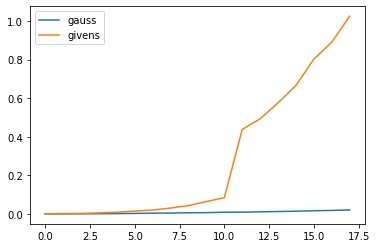

In [525]:
ts = np.array(ts)
plt.plot(ts[:, 0], label="gauss")
plt.plot(ts[:, 1], label="givens")
plt.legend()
plt.show()

# Задача 5

см. задачу 6, в B4.

In [527]:
def get_mpi_Rb(M, f, tau):
    R = np.eye(M.shape[0]) - tau * M
    b = tau * f
    return R, b

In [579]:
@get_time
def mpi_solve(M, f, tau, eps, flag=False):
    R, b = get_mpi_Rb(M, f, tau)

    x = np.random.random(M.shape[0])
    step = 0
    while (np.linalg.norm(M @ x - f) > eps):
        step += 1
        if np.linalg.norm(x) > 1e3 or step > 1e4:
#             print("метод простой итерации расходится: z={:.2f} ~ 1\nstep: {}".format(
#                 check_jacobi_converg(M), step))
            if flag: return x, -10
            else: return x
            break

        x = R@x + b

    if flag:
        return x, step
    else:
        return x

In [530]:
def сhebyshev_mpi_solve(M, f, tau, eps, flag=False):
    R, b = get_mpi_Rb(M, f, tau)
    rho = np.abs(R[0][0]) # R верхнетреугольная
    
    def do_step_0():
        x0 = np.random.random(M.shape[0]);

        y_b = x0;
        y_ = R@y_b + b;

        mu_  = rho
        mu_b = 1

        # завершение шага
        y_bb = y_b
        y_b  = y_

        mu_bb = mu_b
        mu_b  = mu_
        
        return y_bb, y_b, mu_bb, mu_b
    
    
    def do_step(y_bb, y_b, mu_bb, mu_b):
        mu_ = (2/rho/mu_b - 1/mu_bb)**(-1)

        y_ = 2/rho * mu_/mu_b * R@y_b - \
            mu_/mu_bb * y_bb + \
            2/rho * mu_/mu_b * b

        # завершение шага
        y_bb = y_b
        y_b  = y_

        mu_bb = mu_b
        mu_b  = mu_
        return y_bb, y_b, mu_bb, mu_b
    
    
    
    y_bb, y_b, mu_bb, mu_b = do_step_0()
    
    step = 0
    while (np.linalg.norm(M @ y_b - f) > eps):
        step += 1
        if np.linalg.norm(y_b) > 1e3 or step > 1e4 or np.isnan(y_b).any():
#             print("ускоренный метод простой итерации расходится")
            if flag: return x, -10
            else: return x
            break
            
        y_bb, y_b, mu_bb, mu_b = do_step(y_bb, y_b, mu_bb, mu_b)

    if flag:
        return y_b, step
    else:
        return y_b

In [580]:
ns  = range(100, 1000, 10)
tau = 0.1
rep = 100

times = []
for n in ns:
    t = 0
    for _ in range(rep):
        M = np.random.random((n, n))
        M = M.T @ M
        f = np.random.random(n)
        
        t += mpi_solve(M, f, tau, 1e-10) / rep
    times.append(t)

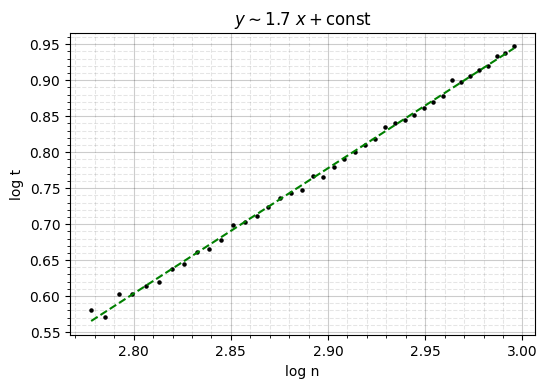

In [581]:
start = 50
end = len(times)

x = np.array(ns[start:end])
y = np.array(times[start:end])*1e3

x = np.log10(x)
y = np.log10(y)

fig, ax = plt.subplots(dpi=100)
coeff, cov = np.polyfit(x, y, 1, cov=True)
plt.scatter(x, y, color="k", s=5)
plt.plot(x, np.poly1d(coeff)(x), "--", color="g")
plt.title("$y \\sim ${:.1f} $x + $const".format(coeff[0]))
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
plt.xlabel("log n")
plt.ylabel("log t")
plt.show()

То есть время работы при размерностях $n > 100$, порядка $O(n^2)$, как и было расчитано (см. пдф. файл).